FORECAST DE VENTAS DE ESTACIÓN DE SERVICIO DE COMBUSTIBLE

1. Creación/Unión de dataframes de ventas obtenidas del ERP.

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

PATH='datasets/'
def load_datasets(path_file):
    return pd.read_csv(path_file)
def concat_df(list_df):
    return pd.concat(list_df, ignore_index=False)
df_enero_2021= load_datasets('datasets/enero_2021.csv')
df_febrero_2022= load_datasets('datasets/febrero_2022.csv')
df_mayo_2022= load_datasets('datasets/mayo_2022.csv')

df_ventas_est= concat_df([df_enero_2021, df_febrero_2022, df_mayo_2022])


C:\Users\KAREN-PC\AppData\Local\Temp\ipykernel_16088\2421221557.py:7: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(path_file)


1.1 Clasificación y Limpieza de los datos. La base de datos extrae información técnica no empleada para el forecast de ventas por lo que hay que optimizar la carga de la información

In [118]:
df_ventas_est=df_ventas_est[['oid', 'tipo', 'turno', 'isla','nom_prod', 'ticket','volumen', 'precio','monto_iva', 'monto_ieps',  'importe', 'fecha', 'cv_tanque']]

In [119]:
def verifica_nan_columnas():
    nan_por_columna = df_ventas_est.isna().sum()
    print("\nCantidad de NaN por columna:")
    print(nan_por_columna)
verifica_nan_columnas()


Cantidad de NaN por columna:
oid               0
tipo              0
turno             0
isla              0
nom_prod          0
ticket        32805
volumen           0
precio            0
monto_iva         0
monto_ieps        0
importe           0
fecha             0
cv_tanque     61406
dtype: int64


In [120]:
df_ventas_est['ticket']=df_ventas_est['ticket'].fillna('0')
df_ventas_est['cv_tanque']=df_ventas_est['cv_tanque'].fillna('0')

verifica_nan_columnas()


Cantidad de NaN por columna:
oid           0
tipo          0
turno         0
isla          0
nom_prod      0
ticket        0
volumen       0
precio        0
monto_iva     0
monto_ieps    0
importe       0
fecha         0
cv_tanque     0
dtype: int64


1.2 Tipificación de los datos de dataframes

In [121]:
def visualizar_tipo_datos():
    print("Tipos de datos originales:")
    print(df_ventas_est.dtypes)
visualizar_tipo_datos()

Tipos de datos originales:
oid             int64
tipo           object
turno           int64
isla            int64
nom_prod       object
ticket         object
volumen       float64
precio        float64
monto_iva     float64
monto_ieps    float64
importe        object
fecha          object
cv_tanque      object
dtype: object


In [122]:
#quitar simbolo de moneda
df_ventas_est['importe'] = df_ventas_est['importe'].str.replace('$', '')
df_ventas_est['importe'] = df_ventas_est['importe'].str.replace(',', '')

#importe debe de ser float
df_ventas_est['importe'] = df_ventas_est['importe'].astype(float)



In [123]:
#fecha debe de ser tipo date
df_ventas_est['fecha'] = df_ventas_est['fecha'].str.replace('.00', '')
df_ventas_est['fecha'] = df_ventas_est['fecha'].str.replace('.0', '')

df_ventas_est['fecha'] =pd.to_datetime(df_ventas_est['fecha'], errors='coerce')
visualizar_tipo_datos()

Tipos de datos originales:
oid                    int64
tipo                  object
turno                  int64
isla                   int64
nom_prod              object
ticket                object
volumen              float64
precio               float64
monto_iva            float64
monto_ieps           float64
importe              float64
fecha         datetime64[ns]
cv_tanque             object
dtype: object


2. Exploración y Visualización de los datos

In [36]:
df_ventas_est.describe() #Visualizar de manera general las ventas de la estacion


,oid,turno,isla,ticket,volumen,precio,monto_iva,monto_ieps
count,98025.000000,98025.000000,98025.000000,6.522000e+04,98025.000000,98025.000000,98025.000000,98025.000000
mean,627.940872,1.509911,2.402408,9.928436e+06,26.627688,22.693929,82.316615,12.880083
std,415.537118,0.515715,1.118767,1.895881e+05,19.201826,1.605385,60.611773,9.683369
min,1.000000,1.000000,1.000000,9.590465e+06,0.000000,19.260000,0.000000,0.000000
25%,281.000000,1.000000,1.000000,9.968299e+06,10.000000,21.320000,29.708414,4.514000
50%,575.000000,2.000000,3.000000,9.988820e+06,22.120000,23.090000,67.518086,10.493875
75%,915.000000,2.000000,3.000000,1.007637e+07,40.000000,23.990000,125.654590,19.519950
max,1838.000000,3.000000,5.000000,1.009666e+07,215.770000,25.490000,641.029162,97.398578


2.1 Identificación de Variables Categoricas
Acotaciones:
D. Despacho - Venta Normal
J. Jarreos por Autoridad
A. Autojarreos, autoevaluación

In [37]:
df_ventas_est['tipo'].value_counts() #Tipo de despachos

tipo
D    97479
J      546
Name: count, dtype: int64

In [38]:
df_ventas_est['nom_prod'].value_counts() #Tipo de producto

nom_prod
SUPER (CN)      59454
PREMIUM (CN)    35172
PREMIUM (CR)     1992
SUPER (CR)       1407
Name: count, dtype: int64

In [39]:
df_ventas_est['turno'].value_counts() #Turno que realiza la venta

turno
1    48828
2    48410
3      787
Name: count, dtype: int64

In [40]:
df_ventas_est['isla'].value_counts() #Isla de la estación donde se realizo la venta

isla
3    33871
1    29760
2    17437
4    15536
5     1421
Name: count, dtype: int64

In [50]:
df_ventas_est['cv_tanque'].value_counts() #Tanque de la estación donde se realizo la venta

cv_tanque
STQ-EDS-0002    22644
STQ-EDS-0007    13975
Name: count, dtype: int64

2.2 Histograma Preliminar del comportamiento de los datos 

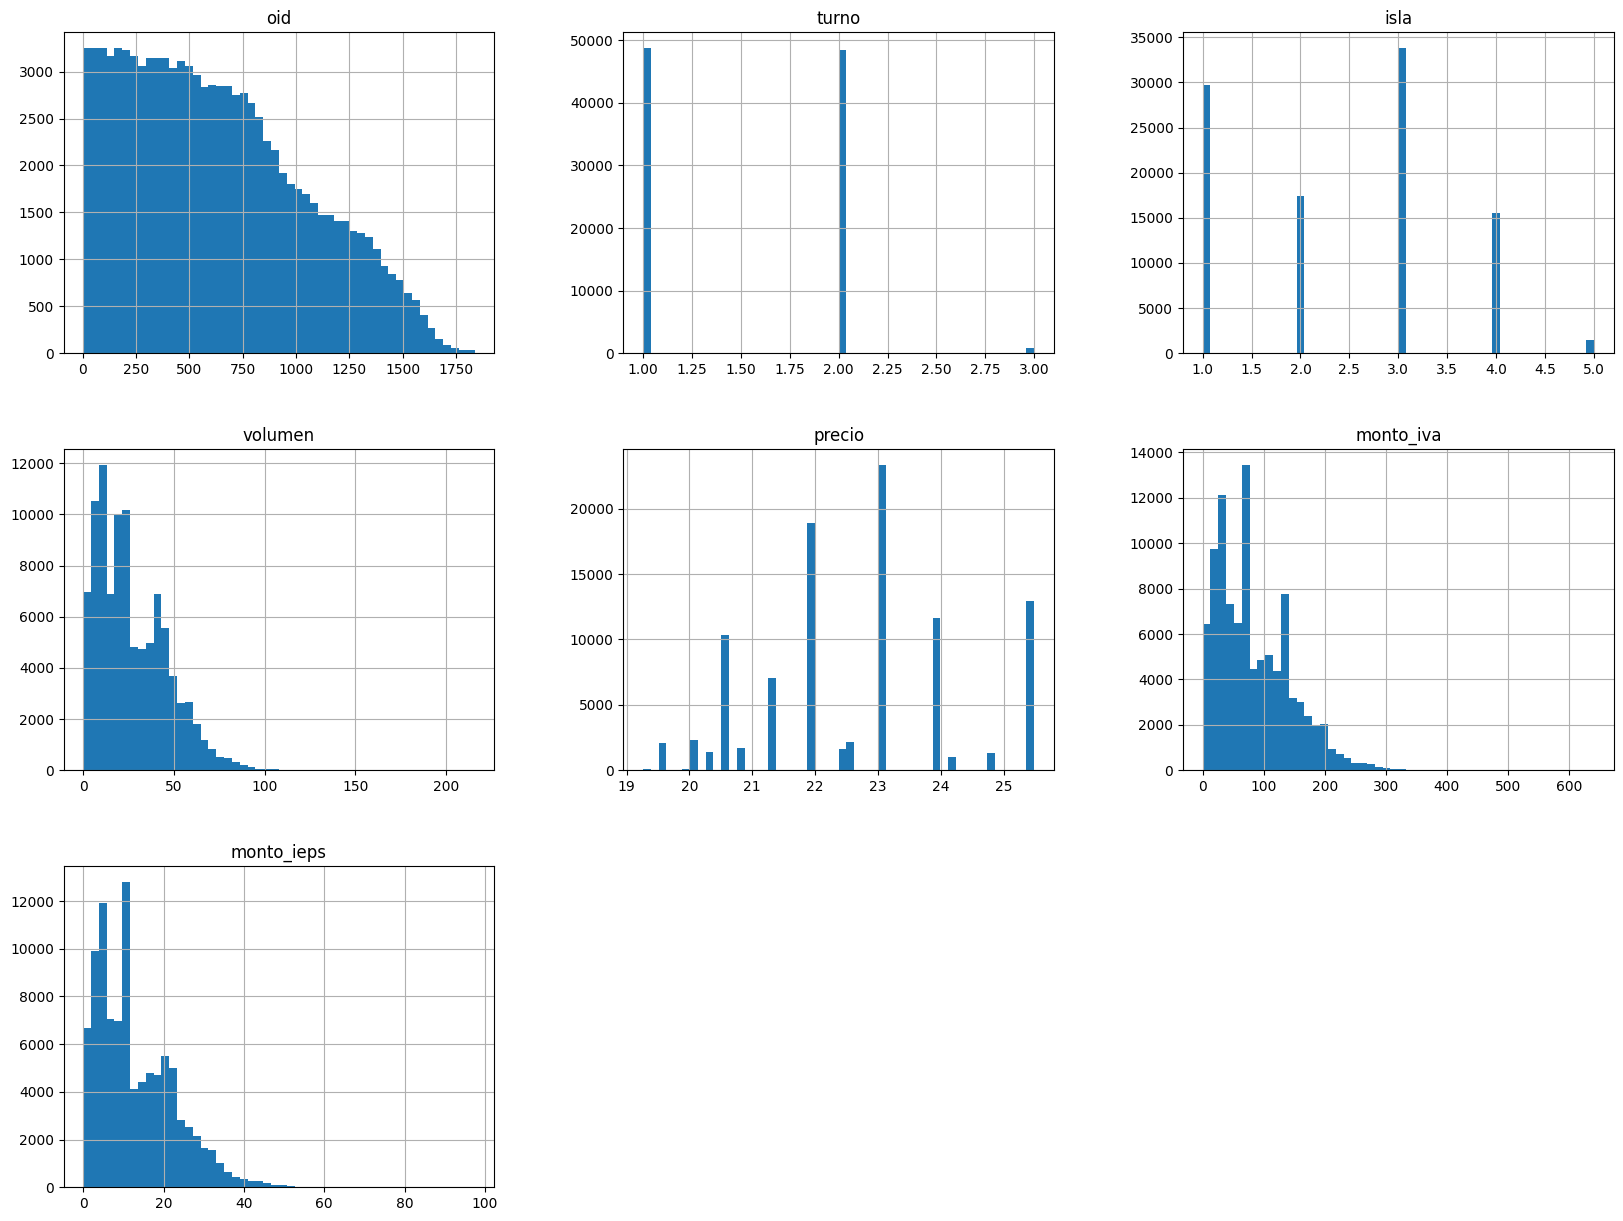

In [61]:
df_ventas_est.hist(bins=50, figsize=(20,15))
plt.show()

    precio    volumen
0    19.26    2189.98
1    19.56   44596.77
2    19.99    3144.04
3    20.06   49423.50
4    20.29   43592.60
5    20.63  219571.31
6    20.79   53526.19
7    21.32  224838.73
8    21.99  430311.81
9    22.42   37751.84
10   22.60   46811.73
11   23.09  538344.17
12   23.99  398675.86
13   24.23   35219.93
14   24.80   45658.09
15   25.49  436522.53


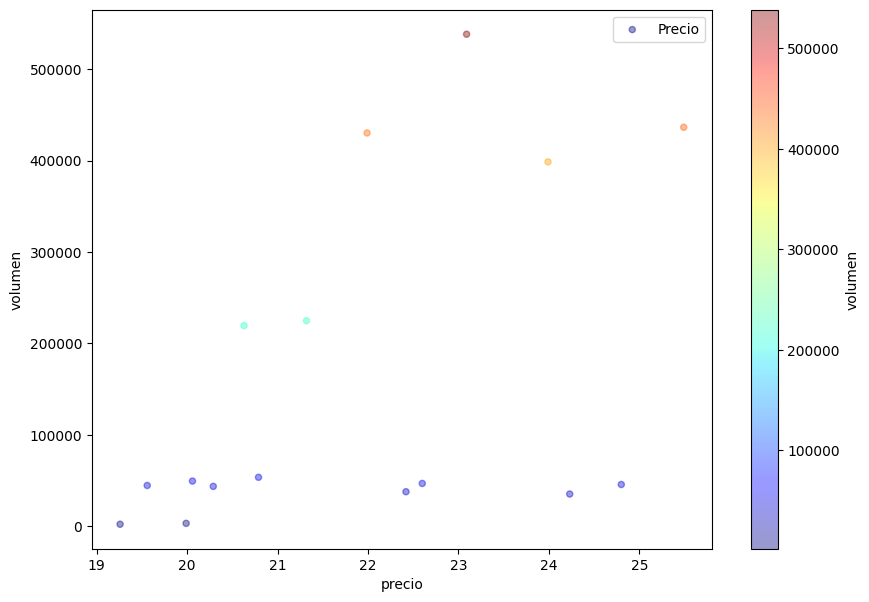

In [138]:
ventas_fecha = df_ventas_est.groupby([df_ventas_est['precio']])['volumen'].sum().reset_index()
print(ventas_fecha)
ventas_fecha.plot(kind="scatter", x="precio", y="volumen", alpha=0.4,
    label="Precio", figsize=(10,7),
    c="volumen", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()
plt.show()